In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import matplotlib

In [2]:
import kMeans as km

In [3]:
import poprawnoscGrupowania as pg

In [4]:
import time

# Zadanie 1, Lista 3

In [13]:
def kwdOdlWGrupach(punkty, centra, przynaleznosc, K,f_odl):
    tabOdleglosci=np.zeros(K)
    for i in range(K):
        maska=np.ma.masked_not_equal(przynaleznosc, i).mask
        punktyWGrupie=np.ma.array(data=punkty,mask=np.broadcast_to(maska,np.shape(punkty)))
        odl=f_odl(punktyWGrupie,centra[:,i])
        tabOdleglosci[i]=np.sum(odl)
    return tabOdleglosci

In [14]:
def run_test():
    print("Poprawny przydział:")
    plt.gcf().set_size_inches(15,15)
    for i in range(d):
        for j in range(i,d):
            plt.subplot(d,d,i*d+j+1)
            pg.rysujNaWykresieGrupy(punkty[i,:],punkty[j,:],poprawneGrupowanie)
    plt.show()
    
    (centraE,przynaleznoscE)=km.kMeans(punkty, K,iteracje=1000)

    macierzKowariancji=np.cov(punkty)
    odwrotnaMacierzKowariancji=np.linalg.inv(macierzKowariancji)
    
    (centraM,przynaleznoscM)=\
        km.kMeans(punkty,K,odl="own",f_odl_own=
                    lambda x,y:distance.cdist(x.T,y.T,"mahalanobis",VI=odwrotnaMacierzKowariancji),
                    iteracje=60000)

    print("K-means+Euklides")
    plt.gcf().set_size_inches(15,15)
    przynaleznoscEIndeksy=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznoscE)
    for i in range(d):
        for j in range(i,d):
            plt.subplot(d,d,i*d+j+1)
            pg.rysujNaWykresieGrupy(punkty[i,:],punkty[j,:],przynaleznoscEIndeksy)
            pg.rysujCentraNaWykresie(centraE[i,:],centraE[j,:])
    plt.show()

    print("K-means+Mahalanobis")
    plt.gcf().set_size_inches(15,15)
    przynaleznoscMIndeksy=pg.zamienTablicePrzynaleznosci2DNa1D(przynaleznoscM)
    for i in range(d):
        for j in range(i,d):
            plt.subplot(d,d,i*d+j+1)
            pg.rysujNaWykresieGrupy(punkty[i,:],punkty[j,:],przynaleznoscMIndeksy)
            pg.rysujCentraNaWykresie(centraM[i,:],centraM[j,:])
    plt.show()
    print("K-means+Euklides")
    print(np.sum((np.sort(centraE,axis=1)-centraPoprawne.T)**2))
    print()

    print("K-means+Mahalanobis")
    print(np.sum((np.sort(centraM,axis=1)-centraPoprawne.T)**2))
    
    print("Odleglosci:")
    kwdOdlWGrupach(punkty, centraE,przynaleznoscE,K,km.kwdOdlEuklidesa)

### Podpunkt a

Poprawny przydział:


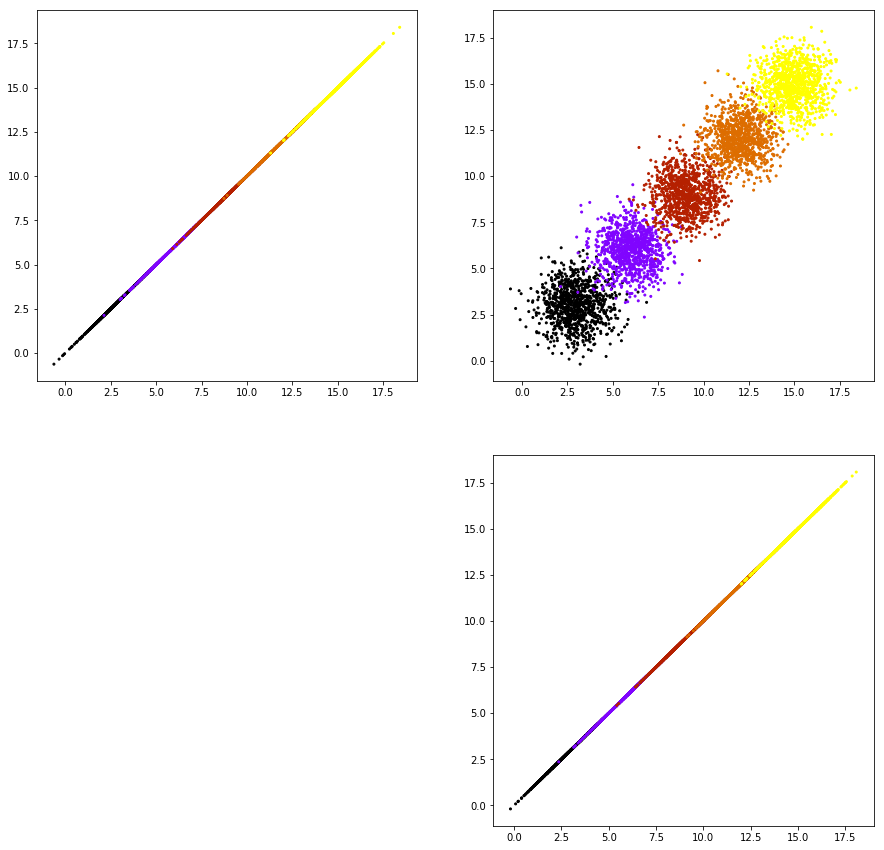

80
37
K-means+Euklides


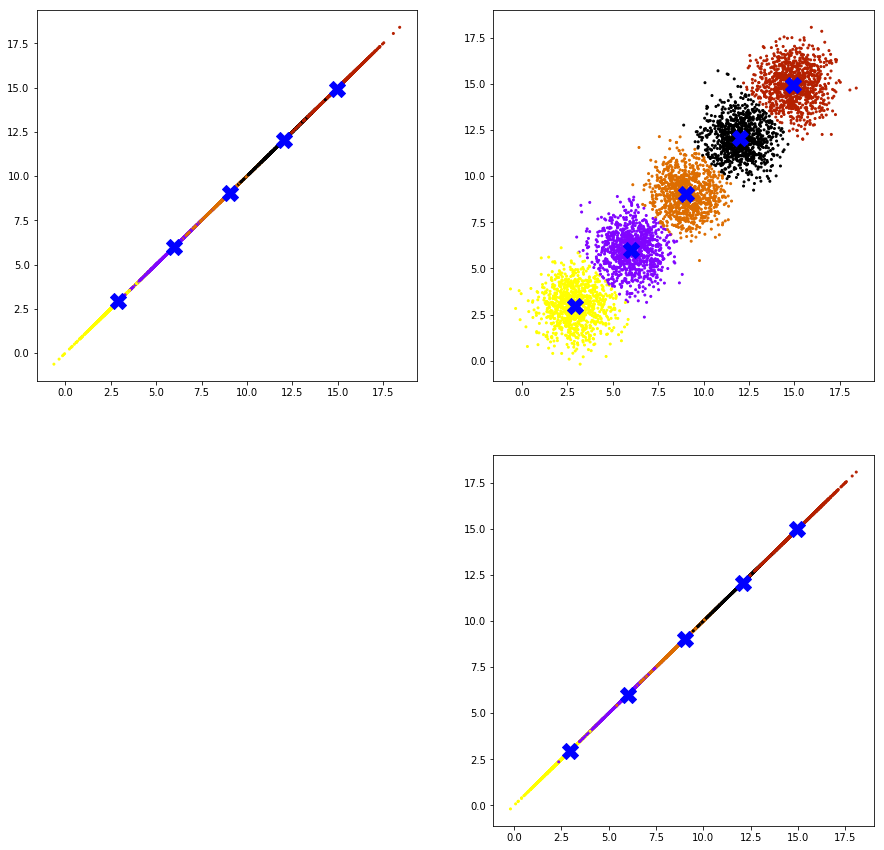

K-means+Mahalanobis


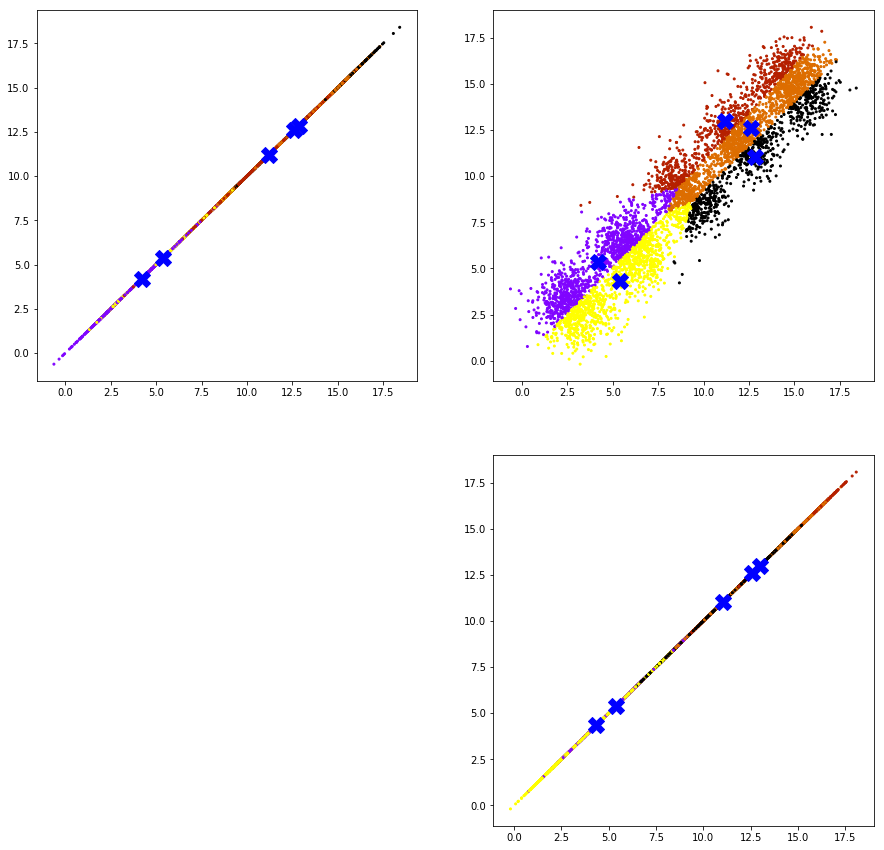

K-means+Euklides
0.020975503174185214

K-means+Mahalanobis
22.411259824596538
Odleglosci:


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (5000,5) and requested shape (2,5000)

In [15]:
d=2
K=5
N=5000
p=np.ones(K)*(1/K)
E=np.eye(d)
mu=np.ones(d)*3;
centraPoprawne=mu
punkty=np.random.multivariate_normal(mu,E,int(p[0]*N)).T
poprawneGrupowanie=np.array([0]*int(p[0]*N))
for i in range(2,K+1):
    mu=np.ones(d)*3*i;
    centraPoprawne=np.vstack((centraPoprawne,mu))
    punkty=np.hstack((punkty,np.random.multivariate_normal(mu,E,int(p[i-1]*N)).T))
    poprawneGrupowanie=np.hstack((poprawneGrupowanie,np.array([i-1]*int(p[i-1]*N))))
run_test()

### Podpunkt b

In [ ]:
d=2
K=5
N=5000
p=np.ones(K)*(1/K)

E=np.eye(d)
mu=np.ones(d)*3;
centraPoprawne=mu
punkty=np.random.multivariate_normal(mu,E,int(p[0]*N)).T
poprawneGrupowanie=np.array([0]*int(p[0]*N))
for i in range(2,K+1):
    if i!=3:
        E=np.eye(d)
    else:
        E=np.array([[3, 0],[0, 1]])

    mu=np.ones(d)*3*i;
    centraPoprawne=np.vstack((centraPoprawne,mu))
    punkty=np.hstack((punkty,np.random.multivariate_normal(mu,E,int(p[i-1]*N)).T))
    poprawneGrupowanie=np.hstack((poprawneGrupowanie,np.array([i-1]*int(p[i-1]*N))))

run_test()

### Podpunkt c

In [ ]:
d=2
K=5
N=5000
p=np.ones(K)*(1/K)

E=np.array([[3, 1],[1, 1]])
mu=np.ones(d)*3;
centraPoprawne=mu
punkty=np.random.multivariate_normal(mu,E,int(p[0]*N)).T
poprawneGrupowanie=np.array([0]*int(p[0]*N))
for i in range(2,K+1):
    if i!=3:
        E=np.eye(d)
    else:
        E=np.array([[3, 0],[0, 1]])

    mu=np.ones(d)*3*i;
    centraPoprawne=np.vstack((centraPoprawne,mu))
    punkty=np.hstack((punkty,np.random.multivariate_normal(mu,E,int(p[i-1]*N)).T))
    poprawneGrupowanie=np.hstack((poprawneGrupowanie,np.array([i-1]*int(p[i-1]*N))))

run_test()

###  Podpunkt d

In [ ]:
d=2
K=5
N=5000
p=np.array([0.2, 0.1, 0.3, 0.1, 0.3])

E=np.array([[3, 1],[1, 1]])
mu=np.ones(d)*3;
centraPoprawne=mu
punkty=np.random.multivariate_normal(mu,E,int(p[0]*N)).T
poprawneGrupowanie=np.array([0]*int(p[0]*N))
for i in range(2,K+1):
    if i!=3:
        E=np.eye(d)
    else:
        E=np.array([[3, 0],[0, 1]])

    mu=np.ones(d)*3*i;
    centraPoprawne=np.vstack((centraPoprawne,mu))
    punkty=np.hstack((punkty,np.random.multivariate_normal(mu,E,int(p[i-1]*N)).T))
    poprawneGrupowanie=np.hstack((poprawneGrupowanie,np.array([i-1]*int(p[i-1]*N))))

run_test()

### Podpunkt e

Poprawny przydział:


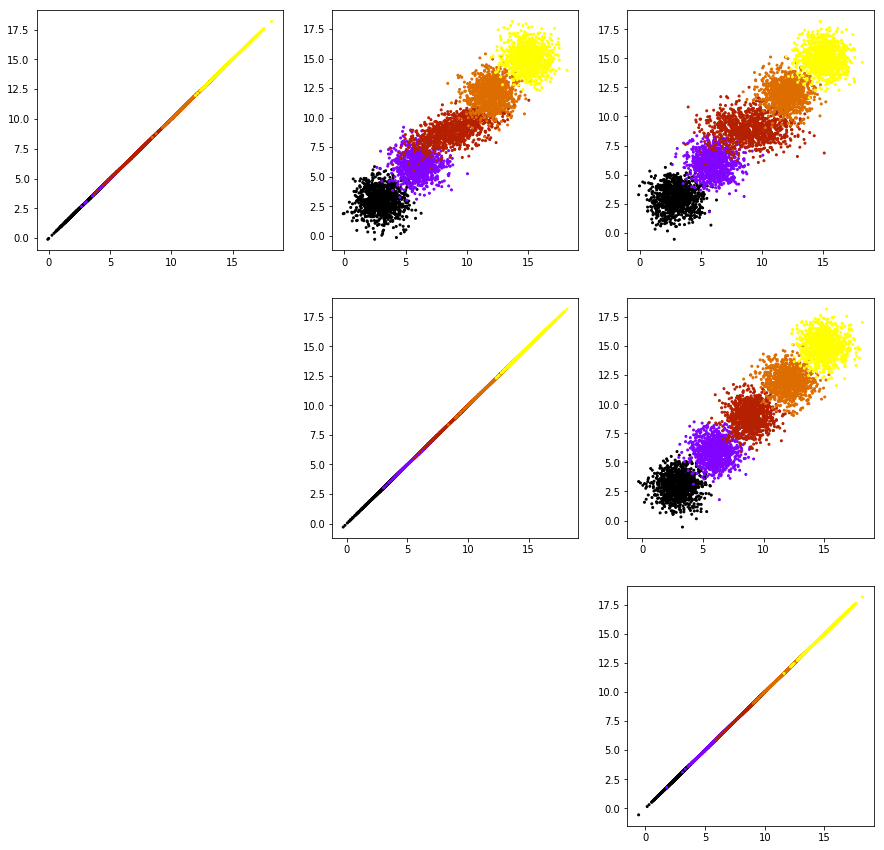

43
32
K-means+Euklides


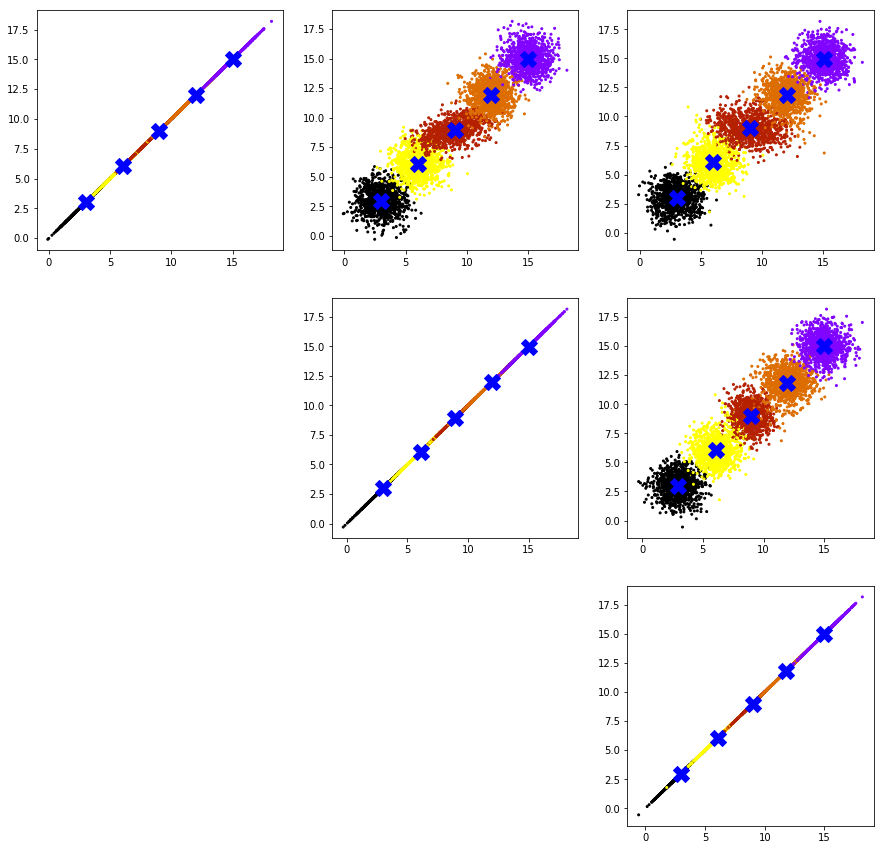

K-means+Mahalanobis


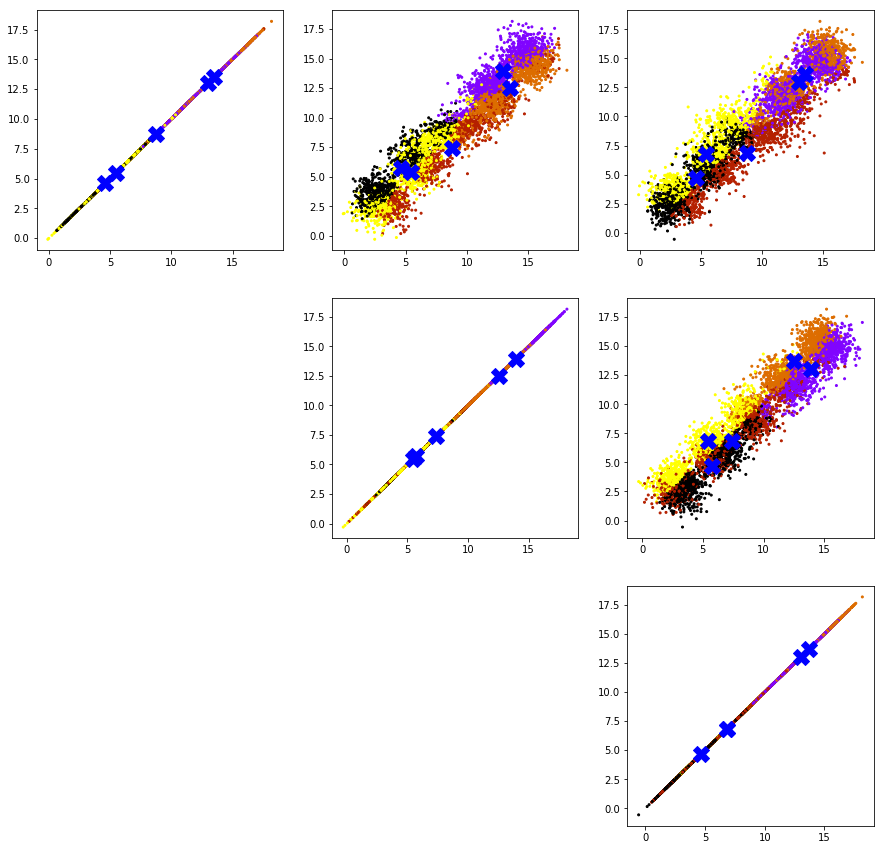

K-means+Euklides
0.05809546109328888

K-means+Mahalanobis
26.980243036434285
Odleglosci:


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (5000,5) and requested shape (3,5000)

In [16]:
d=3
K=5
N=5000
p=np.ones(K)*(1/K)
E=np.eye(d)
mu=np.ones(d)*3;
centraPoprawne=mu
punkty=np.random.multivariate_normal(mu,E,int(p[0]*N)).T
poprawneGrupowanie=np.array([0]*int(p[0]*N))
for i in range(2,K+1):
    
    if i==3:
        E=np.array([[3,1,0],[1,1,0],[0, 0, 1]])
    else:
        E=np.eye(d)
    
    mu=np.ones(d)*3*i;
    centraPoprawne=np.vstack((centraPoprawne,mu))
    punkty=np.hstack((punkty,np.random.multivariate_normal(mu,E,int(p[i-1]*N)).T))
    poprawneGrupowanie=np.hstack((poprawneGrupowanie,np.array([i-1]*int(p[i-1]*N))))
run_test()

### Podpunkt f

In [17]:
d=100
K=10
N=5000
p=np.ones(K)*(1/K)
E=np.eye(d)
mu=np.ones(d)*3;
punkty=np.random.multivariate_normal(mu,E,int(p[0]*N)).T
centraPoprawne=mu
poprawneGrupowanie=np.array([0]*int(p[0]*N))
for i in range(2,K+1):
    mu=np.ones(d)*3*i;
    punkty=np.hstack((punkty,np.random.multivariate_normal(mu,E,int(p[i-1]*N)).T))
    centraPoprawne=np.vstack((centraPoprawne,mu))
    poprawneGrupowanie=np.hstack((poprawneGrupowanie,np.array([i-1]*int(p[i-1]*N))))

    
(centraE,przynaleznoscE)=km.kMeans(punkty, K,iteracje=100)

macierzKowariancji=np.cov(punkty)
odwrotnaMacierzKowariancji=np.linalg.inv(macierzKowariancji)

(centraM,przynaleznoscM)=\
    km.kMeans(punkty,K,odl="own",f_odl_own=
                lambda x,y:distance.cdist(x.T,y.T,"mahalanobis",VI=odwrotnaMacierzKowariancji),
                iteracje=100)

print("K-means+Euklides")
print(np.sum((np.sort(centraE,axis=1)-centraPoprawne.T)**2))
print()

print("K-means+Mahalanobis")
print(np.sum((np.sort(centraM,axis=1)-centraPoprawne.T)**2))

/home/i309016/Zajecia/Semestr3/ED/Lista3/kMeans.py:76: RuntimeWarning: invalid value encountered in true_divide
  return (np.sum(iloczynZMian,axis=1))/(np.sum(przynaleznosc,axis=0))


99
85
K-means+Euklides
nan

K-means+Mahalanobis
58047.09010828516
